In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
# Import song data
data_file = Path("Resources/cleaned_data.csv")
data_df = pd.read_csv(data_file, encoding='utf-8')
data_df.head()

,SongID,Performer,Song,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,genre,duration_m,Month,Day,Year,Overall Peak,Total Weeks on Chart,Total Instances,Top 20
0,......And Roses And Rosesandy Williams,Andy Williams,......And Roses And Roses,166106.0,False,0.154,0.185,5.0,-14.063,1.0,...,4.0,adult standards,2.768433,5,8,1965,36,7,1,0
1,...And Then There Were Drumssandy Nelson,Sandy Nelson,...And Then There Were Drums,172066.0,False,0.588,0.672,11.0,-17.278,0.0,...,4.0,rock,2.867767,10,6,1962,65,4,1,0
2,...Baby One More Timebritney Spears,Britney Spears,...Baby One More Time,211066.0,False,0.759,0.699,0.0,-5.745,0.0,...,4.0,pop,3.517767,1,30,1999,1,32,1,1
3,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,208186.0,False,0.613,0.764,2.0,-6.509,1.0,...,4.0,pop,3.469767,9,23,2017,4,19,1,1
4,'65 Love Affairpaul Davis,Paul Davis,'65 Love Affair,219813.0,False,0.647,0.686,2.0,-4.247,0.0,...,4.0,rock,3.663550,5,22,1982,6,20,1,1


In [3]:
# Get column list
data_df.columns

Index(['SongID', 'Performer', 'Song', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre', 'duration_m', 'Month', 'Day', 'Year',
       'Overall Peak', 'Total Weeks on Chart', 'Total Instances', 'Top 20'],
      dtype='object')

<Axes: title={'center': 'Song Count by Genre'}, xlabel='Song Count', ylabel='genre'>

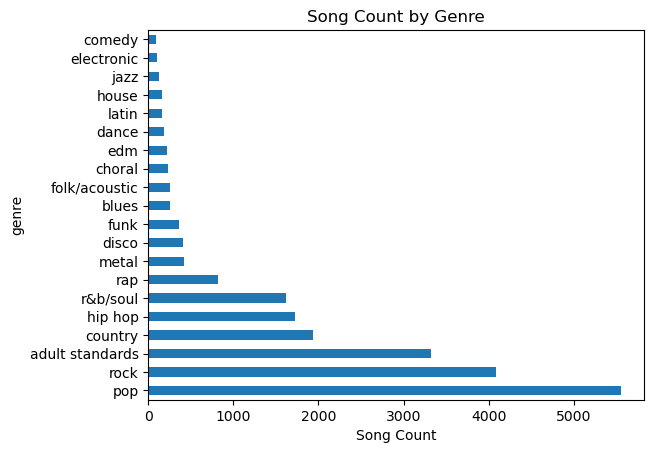

In [4]:
# Get genre names and counts of songs in each
data_df['genre'].value_counts()[:20].plot(kind='barh', title="Song Count by Genre", xlabel="Song Count")

In [5]:
# Make a list of top 20 genres by count
top_genres = data_df['genre'].value_counts()[:20].index.tolist()
print(top_genres)

['pop', 'rock', 'adult standards', 'country', 'hip hop', 'r&b/soul', 'rap', 'metal', 'disco', 'funk', 'blues', 'folk/acoustic', 'choral', 'edm', 'dance', 'latin', 'house', 'jazz', 'electronic', 'comedy']


In [6]:
# Create new DataFrame using only genres in our Top 20 list
top_genre_df = data_df[data_df['genre'].isin(top_genres)]
top_genre_df.columns

Index(['SongID', 'Performer', 'Song', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre', 'duration_m', 'Month', 'Day', 'Year',
       'Overall Peak', 'Total Weeks on Chart', 'Total Instances', 'Top 20'],
      dtype='object')

In [7]:
# Group the data by Year and Genre to see how many songs were in each genre in each year
grouped_genre_year = top_genre_df.groupby(['Year','genre']).agg({'SongID': 'count'})
grouped_genre_year.columns = ['Song Count']
grouped_genre_year.reset_index()

grouped_genre_year.head()

Song Count
Year genre                      
1958 adult standards          80
     blues                     9
     comedy                    2
     country                  12
     folk/acoustic             5

In [8]:
# Unstack the DataFrame to isolate the yearly counts
unstacked_genre_year = grouped_genre_year.unstack()
unstacked_genre_year.head()

Song Count                                                          \
genre adult standards blues choral comedy country dance disco  edm electronic   
Year                                                                            
1958             80.0   9.0    NaN    2.0    12.0   NaN   NaN  NaN        NaN   
1959            160.0  12.0    NaN    1.0    24.0   NaN   NaN  NaN        NaN   
1960            177.0  20.0    NaN    3.0    28.0   NaN   NaN  1.0        3.0   
1961            208.0  28.0    NaN    3.0    18.0   1.0   1.0  1.0        1.0   
1962            198.0  20.0    1.0    3.0    18.0   NaN   NaN  NaN        NaN   

                                                                              \
genre folk/acoustic funk hip hop house  jazz latin metal   pop r&b/soul  rap   
Year                                                                           
1958            5.0  1.0     NaN   NaN   3.0   1.0   NaN  21.0     11.0  1.0   
1959            6.0  NaN     5.0   NaN   6.0   NaN   NaN  63.0     19.0  1.0   
1960            5.0  2.0     1.0   NaN   5.0   NaN   NaN  69.0     24.0  NaN   
1961            3.0  1.0     2.0   NaN   9.0   NaN   NaN  65.0     42.0  NaN   
1962            6.0  NaN     3.0   NaN  10.0   NaN   NaN  74.0     25.0  2.0   

             
genre  rock  
Year         
1958   13.0  
1959   14.0  
1960   11.0  
1961   17.0  
1962   23.0

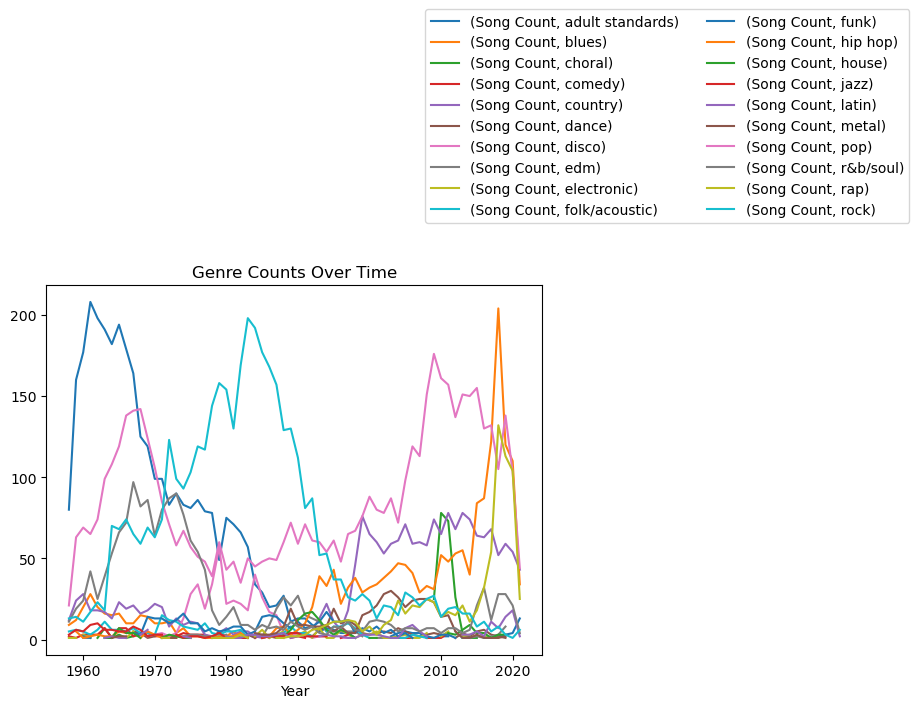

In [9]:
# Plot the yearly counts
unstacked_genre_year.plot(kind='line')
plt.title("Genre Counts Over Time")
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()

## Find correlation between all genres and song attributes

In [10]:
# Make a copy of original DataFrame
genre_data_df = data_df.copy()


genre_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22627 entries, 0 to 22626
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SongID                22627 non-null  object 
 1   Performer             22627 non-null  object 
 2   Song                  22627 non-null  object 
 3   duration_ms           22627 non-null  float64
 4   explicit              22627 non-null  bool   
 5   danceability          22627 non-null  float64
 6   energy                22627 non-null  float64
 7   key                   22627 non-null  float64
 8   loudness              22627 non-null  float64
 9   mode                  22627 non-null  float64
 10  speechiness           22627 non-null  float64
 11  acousticness          22627 non-null  float64
 12  instrumentalness      22627 non-null  float64
 13  liveness              22627 non-null  float64
 14  valence               22627 non-null  float64
 15  tempo              

In [11]:
# Convert 'genre' column from object to categorical type so it can be used in analysis
genre_data_df['genre']=genre_data_df['genre'].astype('category').cat.codes

# Define genre variable for correlation
genre = genre_data_df.iloc[:,17]

In [12]:
# Create empty list for correlation values
corr_attr = []
corr_pearson = []

# Run loop to gather correlation values
for i in range(3,len(genre_data_df.columns)):
    col_name = genre_data_df.columns[i]
    col_value = genre_data_df.iloc[:,i]
    col_corr = round(st.pearsonr(genre, col_value)[0],4)
    print(f"{col_name}, {col_corr}")
    corr_attr.append(col_name)
    corr_pearson.append(col_corr) 

duration_ms, 0.1847
explicit, 0.0934
danceability, 0.1307
energy, 0.2115
key, -0.0057
loudness, 0.1405
mode, -0.0995
speechiness, 0.0783
acousticness, -0.2802
instrumentalness, 0.0031
liveness, -0.0133
valence, 0.0326
tempo, 0.0447
time_signature, 0.0746
genre, 1.0
duration_m, 0.1847
Month, -0.0
Day, -0.006
Year, 0.2002
Overall Peak, -0.0185
Total Weeks on Chart, 0.076
Total Instances, 0.0054
Top 20, 0.0384


In [13]:
# create new DataFrame with correlation values
corr_df = pd.DataFrame(list(zip(corr_attr, corr_pearson)),
               columns =['song_attribute', 'pearson_r'])
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   song_attribute  23 non-null     object 
 1   pearson_r       23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 496.0+ bytes


In [14]:
# Drop 'genre' row (correlation with itself)
corr_df = corr_df.drop(14)

In [15]:
# Sort values by pearson r score
corr_df.sort_values(by=['pearson_r'], ascending=False).head(10)

,song_attribute,pearson_r
3,energy,0.2115
18,Year,0.2002
0,duration_ms,0.1847
15,duration_m,0.1847
5,loudness,0.1405
2,danceability,0.1307
1,explicit,0.0934
7,speechiness,0.0783
20,Total Weeks on Chart,0.0760
13,time_signature,0.0746


## Do correlations improve when genres is filtered down to just Top 20?

In [16]:
# Make a copy of Top 20 Genres DataFrame
top_genre_data_df = top_genre_df.copy()

In [17]:
# Convert 'genre' column from object to categorical type so it can be used in analysis
top_genre_data_df['genre']=top_genre_data_df['genre'].astype('category').cat.codes

# Define genre variable for correlation
genre = top_genre_data_df.iloc[:,17]

In [18]:
# Create empty list for correlation values
corr_attr = []
corr_pearson = []

# Run loop to gather correlation values
for i in range(3,len(top_genre_data_df.columns)):
    col_name = top_genre_data_df.columns[i]
    col_value = top_genre_data_df.iloc[:,i]
    col_corr = round(st.pearsonr(genre, col_value)[0],4)
    print(f"{col_name}, {col_corr}")
    corr_attr.append(col_name)
    corr_pearson.append(col_corr) 

duration_ms, 0.1798
explicit, 0.1154
danceability, 0.1259
energy, 0.2064
key, -0.0089
loudness, 0.1325
mode, -0.1069
speechiness, 0.0915
acousticness, -0.2746
instrumentalness, 0.0056
liveness, -0.0062
valence, 0.0319
tempo, 0.0446
time_signature, 0.0738
genre, 1.0
duration_m, 0.1798
Month, -0.0014
Day, -0.0065
Year, 0.181
Overall Peak, -0.0307
Total Weeks on Chart, 0.0719
Total Instances, 0.0037
Top 20, 0.0542


In [19]:
# create new DataFrame with correlation values
top_genre_corr_df = pd.DataFrame(list(zip(corr_attr, corr_pearson)),
               columns =['song_attribute', 'pearson_r'])
top_genre_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   song_attribute  23 non-null     object 
 1   pearson_r       23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 496.0+ bytes


In [20]:
# Drop 'genre' row (correlation with itself)
top_genre_corr_df = top_genre_corr_df.drop(14)

In [21]:
# Sort values by pearson r score
top_genre_corr_df.sort_values(by=['pearson_r'], ascending=False).head(10)

,song_attribute,pearson_r
3,energy,0.2064
18,Year,0.1810
0,duration_ms,0.1798
15,duration_m,0.1798
5,loudness,0.1325
2,danceability,0.1259
1,explicit,0.1154
7,speechiness,0.0915
13,time_signature,0.0738
20,Total Weeks on Chart,0.0719


## Find genre-specific statistics (Top 10)

In [22]:
# Make a list of top 10 genres by count
top_ten_genres = data_df['genre'].value_counts()[:10].index.tolist()

# Create empty lists for mean values
genre_attr = []
genre_mean = []
genre_data = {}


# Using top_genres list, run loop to gather correlation values
for i in range(len(top_ten_genres)):
    mean_data = {}
    # Filter data to just selected genre
    temp_df = top_genre_df[top_genre_df['genre'] == top_ten_genres[i]]
    # Convert 'genre' column from object to categorical type so it can be used in analysis
    temp_df['genre']=top_genre_data_df['genre'].astype('category').cat.codes
    
    print(f"\n{top_ten_genres[i]}")
    
    for j in range(3,len(temp_df.columns)):      
        col_name = temp_df.columns[j]
        col_mean = round(temp_df[col_name].mean(),4)        
        print(f"{col_name}, Average: {col_mean}")
        mean_data.update({col_name: col_mean})
    genre_data.update({top_ten_genres[i]: mean_data})


pop
duration_ms, Average: 216478.5227
explicit, Average: 0.0931
danceability, Average: 0.6133
energy, Average: 0.6345
key, Average: 5.2111
loudness, Average: -7.8745
mode, Average: 0.6839
speechiness, Average: 0.0703
acousticness, Average: 0.2708
instrumentalness, Average: 0.0167
liveness, Average: 0.1931
valence, Average: 0.6003
tempo, Average: 119.7971
time_signature, Average: 3.937
genre, Average: 16.0
duration_m, Average: 3.608
Month, Average: 6.589
Day, Average: 15.5708
Year, Average: 1992.7997
Overall Peak, Average: 40.1048
Total Weeks on Chart, Average: 13.0782
Total Instances, Average: 1.1183
Top 20, Average: 0.373

rock
duration_ms, Average: 242435.8293
explicit, Average: 0.0054
danceability, Average: 0.5661
energy, Average: 0.6732
key, Average: 5.1117
loudness, Average: -9.1072
mode, Average: 0.7668
speechiness, Average: 0.0475
acousticness, Average: 0.211
instrumentalness, Average: 0.0387
liveness, Average: 0.1926
valence, Average: 0.6339
tempo, Average: 123.3033
time_signa

C:\Users\cbens\AppData\Local\Temp\ipykernel_36760\3567761854.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['genre']=top_genre_data_df['genre'].astype('category').cat.codes


In [23]:
print(genre_data)

{'pop': {'duration_ms': 216478.5227, 'explicit': 0.0931, 'danceability': 0.6133, 'energy': 0.6345, 'key': 5.2111, 'loudness': -7.8745, 'mode': 0.6839, 'speechiness': 0.0703, 'acousticness': 0.2708, 'instrumentalness': 0.0167, 'liveness': 0.1931, 'valence': 0.6003, 'tempo': 119.7971, 'time_signature': 3.937, 'genre': 16.0, 'duration_m': 3.608, 'Month': 6.589, 'Day': 15.5708, 'Year': 1992.7997, 'Overall Peak': 40.1048, 'Total Weeks on Chart': 13.0782, 'Total Instances': 1.1183, 'Top 20': 0.373}, 'rock': {'duration_ms': 242435.8293, 'explicit': 0.0054, 'danceability': 0.5661, 'energy': 0.6732, 'key': 5.1117, 'loudness': -9.1072, 'mode': 0.7668, 'speechiness': 0.0475, 'acousticness': 0.211, 'instrumentalness': 0.0387, 'liveness': 0.1926, 'valence': 0.6339, 'tempo': 123.3033, 'time_signature': 3.9618, 'genre': 19.0, 'duration_m': 4.0406, 'Month': 6.6035, 'Day': 15.8046, 'Year': 1982.737, 'Overall Peak': 38.9476, 'Total Weeks on Chart': 12.4137, 'Total Instances': 1.0416, 'Top 20': 0.3598}, 

In [24]:
top_ten_genres_df = pd.DataFrame.from_dict(genre_data, orient='index')
top_ten_genres_df = top_ten_genres_df.drop(columns=['duration_ms','time_signature', 'genre', 'Month','Day'])
top_ten_genres_df['Year'] = round(top_ten_genres_df['Year'],0)
top_ten_genres_df = top_ten_genres_df.transpose()
top_ten_genres_df

,pop,rock,adult standards,country,hip hop,r&b/soul,rap,metal,disco,funk
explicit,0.0931,0.0054,0.0015,0.0036,0.7501,0.0624,0.8374,0.1178,0.0000,0.1676
danceability,0.6133,0.5661,0.5195,0.5627,0.7331,0.5988,0.7131,0.4913,0.7127,0.6887
energy,0.6345,0.6732,0.4880,0.6522,0.6496,0.5551,0.6435,0.8130,0.6701,0.6229
key,5.2111,5.1117,5.2249,5.2126,5.2516,5.2804,5.4804,5.2716,5.3603,5.5698
loudness,-7.8745,-9.1072,-10.7842,-6.9740,-6.9406,-9.6717,-6.5391,-5.5195,-10.1343,-9.1813
mode,0.6839,0.7668,0.8235,0.9221,0.5867,0.6893,0.5281,0.6851,0.5637,0.6117
speechiness,0.0703,0.0475,0.0439,0.0418,0.2065,0.0638,0.1932,0.0597,0.0545,0.0951
acousticness,0.2708,0.2110,0.5207,0.2827,0.1516,0.3871,0.1635,0.0523,0.1718,0.2400
instrumentalness,0.0167,0.0387,0.0247,0.0078,0.0126,0.0352,0.0060,0.0356,0.0907,0.0451
liveness,0.1931,0.1926,0.2046,0.1745,0.1954,0.1921,0.1949,0.1845,0.1671,0.1892


In [39]:
# Create a Series for each song attribute
explicit = top_ten_genres_df.loc['explicit',:]
explicit = explicit.sort_values(ascending=False)
print(explicit)  

rap                0.8374
hip hop            0.7501
funk               0.1676
metal              0.1178
pop                0.0931
r&b/soul           0.0624
rock               0.0054
country            0.0036
adult standards    0.0015
disco              0.0000
Name: explicit, dtype: float64


In [40]:
valence = top_ten_genres_df.loc['valence',:]
valence = valence.sort_values(ascending=False)
print(valence)

disco              0.7783
r&b/soul           0.6590
funk               0.6465
rock               0.6339
pop                0.6003
adult standards    0.5939
country            0.5466
hip hop            0.5153
rap                0.4922
metal              0.4471
Name: valence, dtype: float64


In [41]:
danceability = top_ten_genres_df.loc['danceability',:]
danceability = danceability.sort_values(ascending=False)
print(danceability) 

hip hop            0.7331
rap                0.7131
disco              0.7127
funk               0.6887
pop                0.6133
r&b/soul           0.5988
rock               0.5661
country            0.5627
adult standards    0.5195
metal              0.4913
Name: danceability, dtype: float64


In [42]:
speechiness = top_ten_genres_df.loc['speechiness',:]
speechiness = speechiness.sort_values(ascending=False)
print(speechiness) 

hip hop            0.2065
rap                0.1932
funk               0.0951
pop                0.0703
r&b/soul           0.0638
metal              0.0597
disco              0.0545
rock               0.0475
adult standards    0.0439
country            0.0418
Name: speechiness, dtype: float64


In [43]:
loudness = top_ten_genres_df.loc['loudness',:]
loudness = loudness.sort_values(ascending=False)
print(loudness) 

metal              -5.5195
rap                -6.5391
hip hop            -6.9406
country            -6.9740
pop                -7.8745
rock               -9.1072
funk               -9.1813
r&b/soul           -9.6717
disco             -10.1343
adult standards   -10.7842
Name: loudness, dtype: float64
